In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import sklearn as sk

In [ ]:
input_1 = 'file_input_uploads/heart_disease_uci.csv'

In [ ]:
!pip install pyreadstat


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


### Data Aquisition

In [ ]:
# Update the file path to the correct one provided earlier

df = pd.read_csv(input_1)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.shape

(920, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
#basic descriptives 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,920.000,460.500,265.725,1.000,230.750,460.500,690.250,920.000
age,920.000,53.511,9.425,28.000,47.000,54.000,60.000,77.000
trestbps,861.000,132.132,19.066,0.000,120.000,130.000,140.000,200.000
chol,890.000,199.130,110.781,0.000,175.000,223.000,268.000,603.000
thalch,865.000,137.546,25.926,60.000,120.000,140.000,157.000,202.000
oldpeak,858.000,0.879,1.091,-2.600,0.000,0.500,1.500,6.200
ca,309.000,0.676,0.936,0.000,0.000,0.000,1.000,3.000
num,920.000,0.996,1.143,0.000,0.000,1.000,2.000,4.000


### Filtering Dataset

In [ ]:
#deleting the ID variable since it is not useful for our analysis
df = df.drop(columns=['id'])
df.shape

(920, 15)

In [ ]:
#find missing values
df.isnull()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
916,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False
917,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
918,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False


In [ ]:
df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


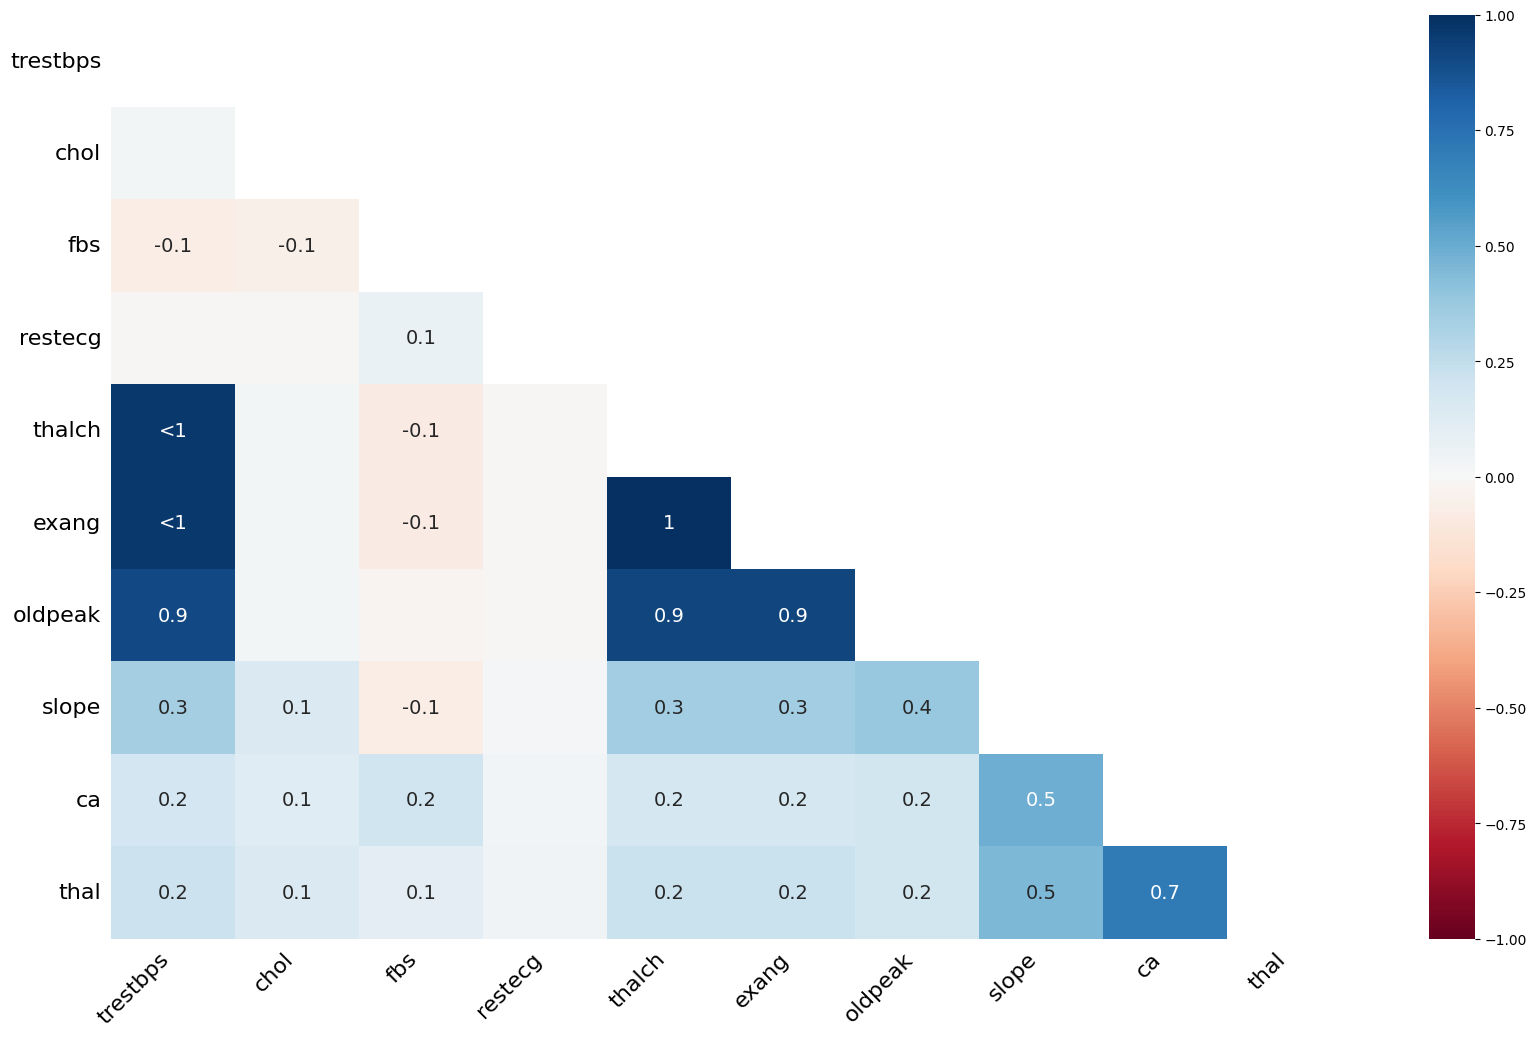

In [ ]:
# Fixing the code by installing the missingno package
!pip install missingno

# Now, retry visualizing the missing values
import missingno as msno
msno.heatmap(df)
plt.show()

In [ ]:
# Correcting fillna for categorical columns and filling with appropriate values

df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
df['chol'].fillna(df['chol'].mean(), inplace=True)
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)  # categorical

df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)  # categorical
df['thalch'].fillna(df['thalch'].mean(), inplace=True)
df['exang'].fillna(df['exang'].mode()[0], inplace=True)  # categorical
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)  # categorical
df['ca'].fillna(df['ca'].median(), inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)  # categorical

# Check for any remaining missing values
df.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
#checking for duplicates 
df.duplicated().sum()

2

In [ ]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

### Data Transformation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   dataset   918 non-null    object 
 3   cp        918 non-null    object 
 4   trestbps  918 non-null    float64
 5   chol      918 non-null    float64
 6   fbs       918 non-null    bool   
 7   restecg   918 non-null    object 
 8   thalch    918 non-null    float64
 9   exang     918 non-null    bool   
 10  oldpeak   918 non-null    float64
 11  slope     918 non-null    object 
 12  ca        918 non-null    float64
 13  thal      918 non-null    object 
 14  num       918 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(6)
memory usage: 102.2+ KB


### Exploratory Data Analysis

In [ ]:
# The error occurs because 'groupby' tries to calculate the mean of non-numeric data types. We can select only numeric columns before applying 'groupby'.

df.groupby('sex').mean(numeric_only=True)

,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num
sex,,,,,,,,,
Female,52.492,132.209,240.165,0.098,146.083,0.223,0.673,0.275,0.425
Male,53.782,132.118,188.179,0.164,135.269,0.404,0.936,0.215,1.148


In [ ]:
df.groupby('sex')['num'].mean()

sex
Female   0.425
Male     1.148
Name: num, dtype: float64

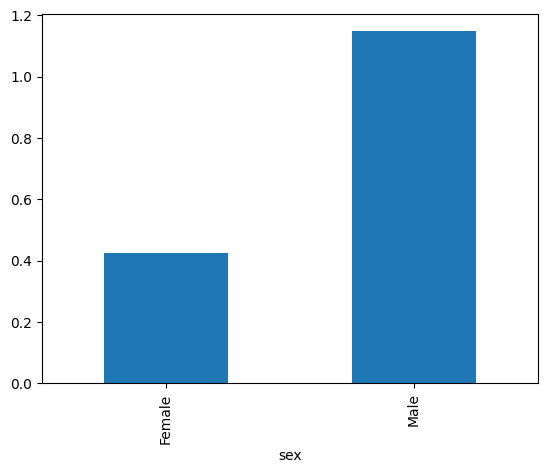

In [ ]:
df.groupby('sex')['num'].mean().plot(kind='bar')
plt.show()

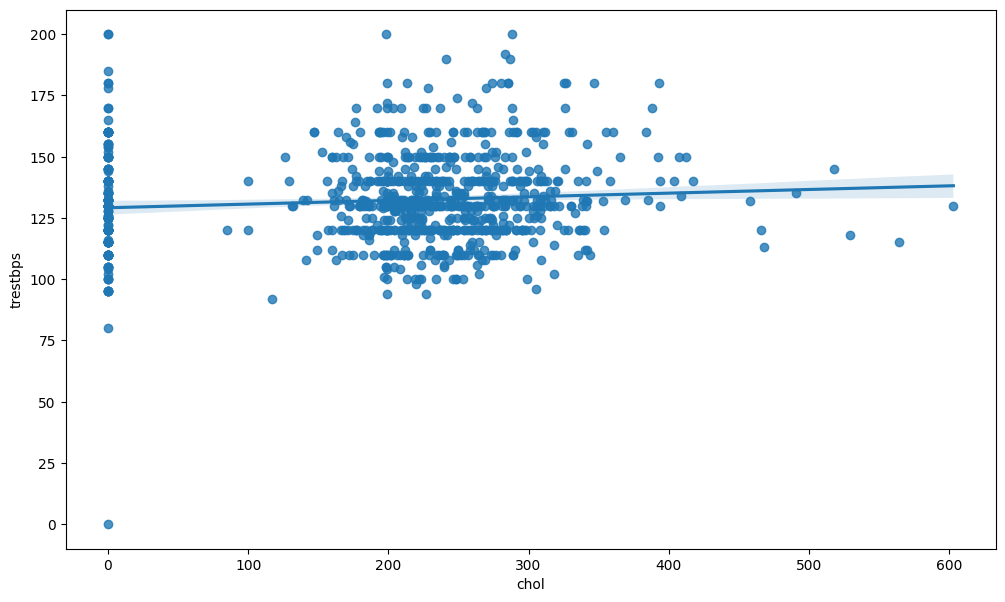

In [ ]:
plt.figure(figsize=(12,7))
sns.regplot(x='chol', y='trestbps', data=df)
plt.show()

In [ ]:
df.nunique().sort_values()

sex           2
fbs           2
exang         2
restecg       3
slope         3
thal          3
dataset       4
cp            4
ca            4
num           5
age          50
oldpeak      54
trestbps     62
thalch      120
chol        218
dtype: int64

In [ ]:
#categorical values labeled as floats 
fhs_cat = df.select_dtypes(include='object')
fhs_cat.nunique().sort_values()

sex        2
restecg    3
slope      3
thal       3
dataset    4
cp         4
dtype: int64

In [ ]:
# Fixing the error by accessing the correct column 'feature' instead of 'features'
# and using the correct column from the DataFrame.

# Creating a subset of categorical values labeled as floats 
col_int = df.nunique().reset_index()
col_int.columns = ['feature', 'object']
col_int['object'] = col_int['object'].astype('int64')
col_int = col_int.sort_values(by='object')
col_int = col_int[col_int['object'] < 10]

# Accessing the correct column name
col_int['feature'].values

array(['sex', 'fbs', 'exang', 'restecg', 'slope', 'thal', 'dataset', 'cp',
       'ca', 'num'], dtype=object)

In [ ]:
#creating a subset of categorical values labeled as floats
col_int = df.nunique().reset_index()
col_int

,index,0
0,age,50
1,sex,2
2,dataset,4
3,cp,4
4,trestbps,62
5,chol,218
6,fbs,2
7,restecg,3
8,thalch,120
9,exang,2


In [ ]:
# Correcting the KeyError by accessing the correct column name '0'
# Extracting categorical columns based on unique counts
categorical_columns = col_int['index'][col_int[0] < 10]
fhs_cat = df[categorical_columns]
fhs_cat.head()

,sex,dataset,cp,fbs,restecg,exang,slope,ca,thal,num
0,Male,Cleveland,typical angina,True,lv hypertrophy,False,downsloping,0.000,fixed defect,0
1,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,3.000,normal,2
2,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,2.000,reversable defect,1
3,Male,Cleveland,non-anginal,False,normal,False,downsloping,0.000,normal,0
4,Female,Cleveland,atypical angina,False,lv hypertrophy,False,upsloping,0.000,normal,0


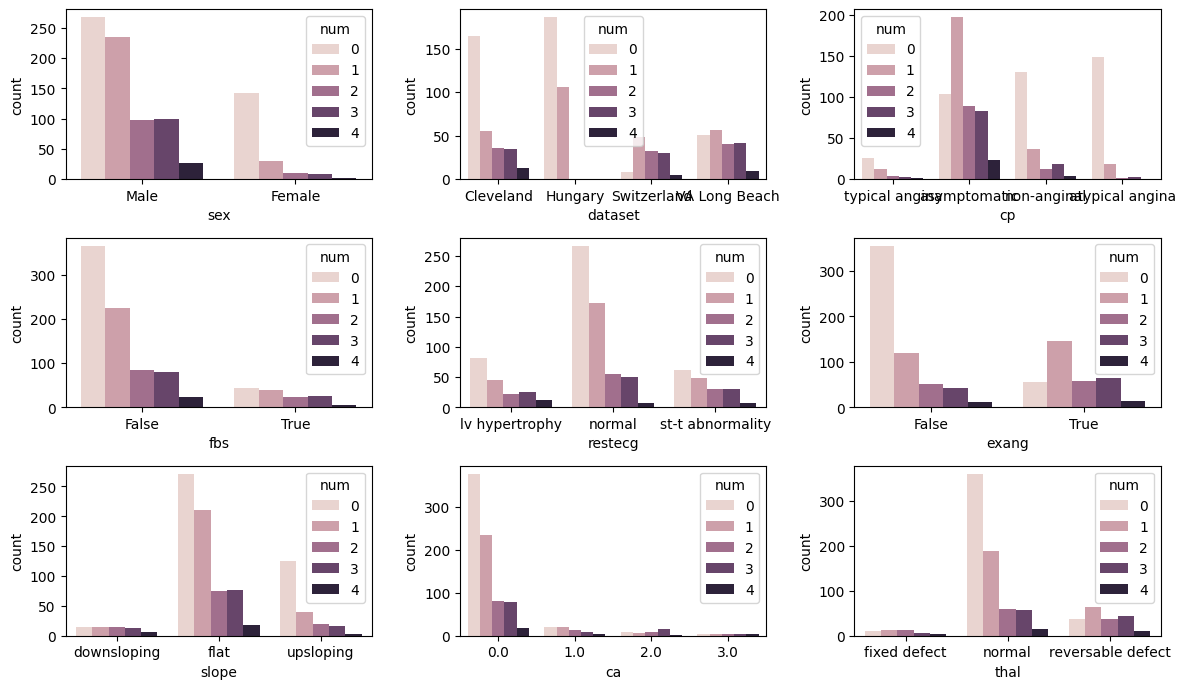

In [ ]:
plt.figure(figsize=(12,7))
for idx, col in enumerate(fhs_cat.columns[:9]):  # Adjust to handle only 9 plots
    plt.subplot(3, 3, idx + 1)
    sns.countplot(x=col, hue='num', data=fhs_cat)
plt.tight_layout()
plt.show()

### Continuous Variables

In [ ]:
fhs_cont = df.select_dtypes(include='float')
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trestbps  918 non-null    float64
 1   chol      918 non-null    float64
 2   thalch    918 non-null    float64
 3   oldpeak   918 non-null    float64
 4   ca        918 non-null    float64
dtypes: float64(5)
memory usage: 43.0 KB


In [ ]:
# To fix the error, we need to define the 'cat_col' variable before using it.
# Since we're dealing with categorical columns, let's identify them and use this in the correction.

# Identify categorical columns
cat_col = df.select_dtypes(include=['object', 'bool']).columns

# Drop the categorical columns to create the continuous DataFrame
fhs_cont = df.drop(columns=cat_col)

# Display the information of continuous variables
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   trestbps  918 non-null    float64
 2   chol      918 non-null    float64
 3   thalch    918 non-null    float64
 4   oldpeak   918 non-null    float64
 5   ca        918 non-null    float64
 6   num       918 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 57.4 KB


In [ ]:
fhs_cont.corr()

,age,trestbps,chol,thalch,oldpeak,ca,num
age,1.000,0.234,-0.085,-0.353,0.248,0.219,0.339
trestbps,0.234,1.000,0.088,-0.103,0.160,0.036,0.114
chol,-0.085,0.088,1.000,0.227,0.046,0.155,-0.229
thalch,-0.353,-0.103,0.227,1.000,-0.150,0.040,-0.350
oldpeak,0.248,0.160,0.046,-0.150,1.000,0.210,0.423
ca,0.219,0.036,0.155,0.040,0.210,1.000,0.262
num,0.339,0.114,-0.229,-0.350,0.423,0.262,1.000


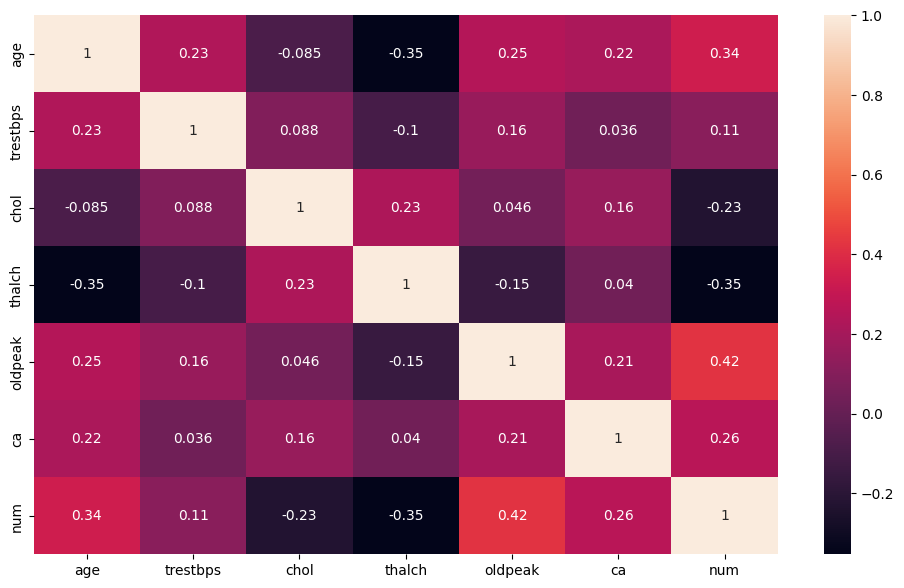

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(fhs_cont.corr(), annot=True)
plt.show()

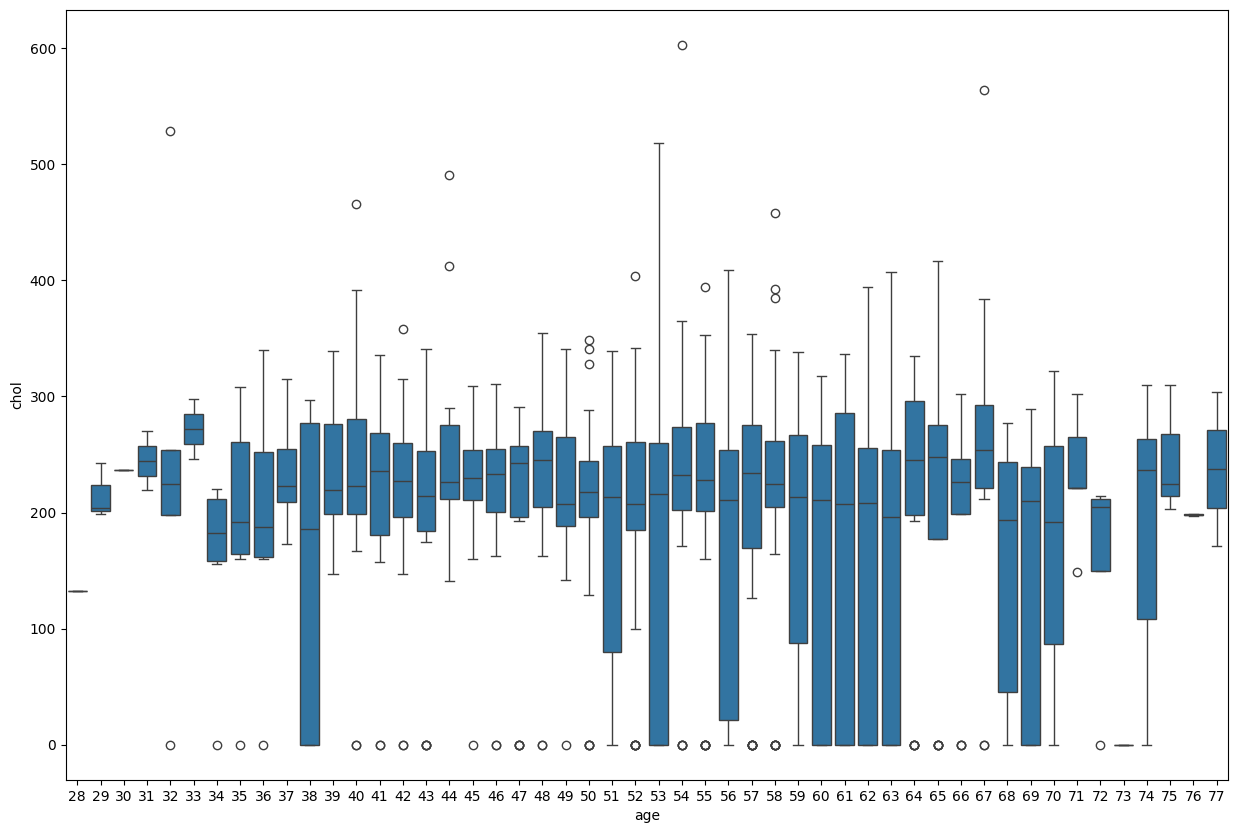

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df, x="age", y="chol", ax=ax)
plt.show()

### Generate Machine Learning Model

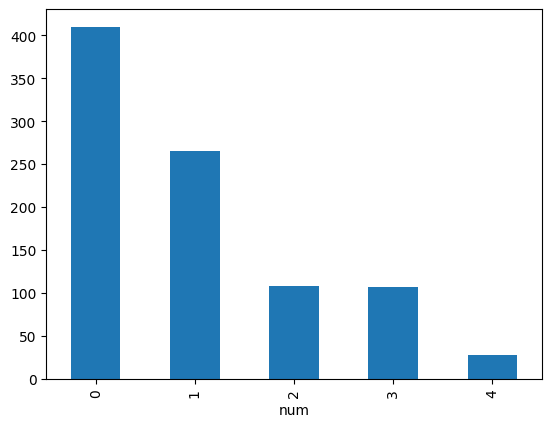

In [ ]:
df['num'].value_counts()
df['num'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   trestbps  918 non-null    float64
 2   chol      918 non-null    float64
 3   thalch    918 non-null    float64
 4   oldpeak   918 non-null    float64
 5   ca        918 non-null    float64
 6   num       918 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 57.4 KB


In [ ]:
#seperate array into input (x) and output (y) components 
x = fhs_cont
x.shape

(918, 7)

In [ ]:
y = df['num']
y.shape

(918,)

### The Synthetic Minority Over-sampling Technique (SMOTE)

In [ ]:
# Install the imbalanced-learn package which contains SMOTE
!pip install imbalanced-learn

# Re-import SMOTE and perform the resampling
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
x_os, y_os = os.fit_resample(x, y)
x_os.shape, y_os.shape


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


((2050, 7), (2050,))

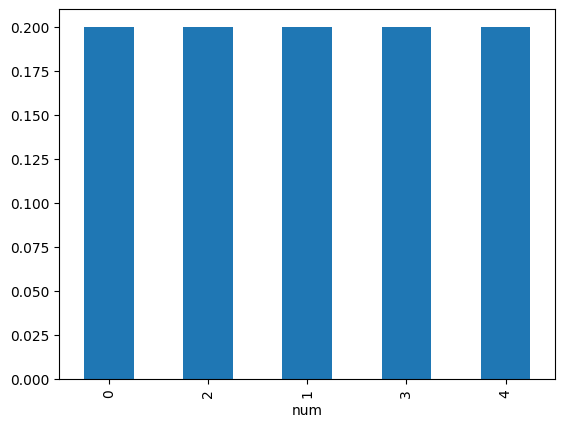

In [ ]:
y_os.value_counts(normalize=True).plot(kind='bar')
plt.show()

In [ ]:
# Fixing the code by importing StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_os, y_os, test_size=0.3, random_state=0)
sc_train = StandardScaler().fit(x_train)
x_train_sc = sc_train.transform(x_train)

In [ ]:
# Fix the code by using parentheses instead of square brackets for the print function
np.set_printoptions(precision=3)
print(x_train_sc[0:5,:])

[[ 0.629 -0.756  1.323 -1.433 -1.127 -0.524  0.693]
 [ 0.51  -0.496 -1.598 -1.146 -1.127 -0.524  0.693]
 [-1.989 -0.802  0.077 -0.154 -0.269 -0.524 -0.729]
 [ 0.391 -0.059  0.016 -0.159  0.726 -0.524  1.404]
 [-0.68  -0.181  0.422 -0.44   0.644 -0.524 -0.729]]


In [ ]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression Classifier
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(x_train_sc, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
sc_test = StandardScaler().fit(x_test)
x_test_sc = sc_test.transform(x_test)

In [ ]:
#test the performance of the model 
results = model_lr.score(x_test_sc, y_test)
results * 100

87.47967479674796

In [ ]:
results = model_lr.score(x_train_sc, y_train)
results * 100

87.52613240418118

### Model Optimization

In [ ]:
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   trestbps  918 non-null    float64
 2   chol      918 non-null    float64
 3   thalch    918 non-null    float64
 4   oldpeak   918 non-null    float64
 5   ca        918 non-null    float64
 6   num       918 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 57.4 KB


In [ ]:
#list of categorical columns 
cat_col

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [ ]:
fhs_cont['sex'] = df['sex']
fhs_cont['fbs'] = df['fbs']
fhs_cont['exang'] = df['exang']
fhs_cont['slope'] = df['slope']
fhs_cont['ca'] = df['ca']
fhs_cont['thal'] = df['thal']

In [ ]:
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   trestbps  918 non-null    float64
 2   chol      918 non-null    float64
 3   thalch    918 non-null    float64
 4   oldpeak   918 non-null    float64
 5   ca        918 non-null    float64
 6   num       918 non-null    int64  
 7   sex       918 non-null    object 
 8   fbs       918 non-null    bool   
 9   exang     918 non-null    bool   
 10  slope     918 non-null    object 
 11  thal      918 non-null    object 
dtypes: bool(2), float64(5), int64(2), object(3)
memory usage: 80.7+ KB


In [ ]:
# Converting categorical variables to numerical using encoding
data_encoded = pd.get_dummies(fhs_cont, drop_first=True)

# Splitting the data using the encoded DataFrame
os = SMOTE(random_state=0)
x_os, y_os = os.fit_resample(data_encoded.drop(columns='num'), data_encoded['num'])
x_train, x_test, y_train, y_test = train_test_split(x_os, y_os, test_size=0.3, random_state=0)

# Scaling the data
lr_1 = LogisticRegression(solver='liblinear')
sc_train = StandardScaler().fit(x_train)
x_train_sc = sc_train.transform(x_train)
x_train_sc

array([[ 0.628, -0.756,  1.323, ..., -0.514,  0.537, -0.861],
       [ 0.509, -0.496, -1.598, ..., -0.514, -1.863,  1.161],
       [-1.989, -0.802,  0.077, ..., -0.514, -1.863,  1.161],
       ...,
       [ 0.152, -0.059,  0.803, ..., -0.514,  0.537, -0.861],
       [-0.086, -0.986,  0.014, ..., -0.514,  0.537, -0.861],
       [ 0.152,  0.366,  1.022, ..., -0.514,  0.537, -0.861]])

In [ ]:
lr_1.fit(x_train_sc, y_train)

sc_test = StandardScaler().fit(x_test)
x_test_sc = sc_test.transform(x_test)
x_test_sc

array([[ 0.733,  0.811, -1.57 , ..., -0.57 ,  0.497,  1.176],
       [-0.217, -0.901, -1.57 , ..., -0.57 ,  0.497,  1.176],
       [ 0.02 , -0.854, -1.57 , ..., -0.57 , -2.01 ,  1.176],
       ...,
       [-0.81 ,  0.454,  1.383, ...,  1.753,  0.497,  1.176],
       [-2.354, -0.901, -0.161, ..., -0.57 ,  0.497, -0.85 ],
       [ 0.495,  1.467,  1.02 , ...,  1.753,  0.497, -0.85 ]])

### Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
lr_2 = LogisticRegression(solver='liblinear')
results = cross_val_score(lr_2, x_train_sc, y_train, cv=kfold)
results

array([0.486, 0.521, 0.5  , 0.424, 0.417, 0.559, 0.524, 0.497, 0.399,
       0.538])

In [ ]:
results.mean()*100, results.std()*100

(48.6470473970474, 5.242287506872692)

In [ ]:
# Fixing the error by using the correct variable name 'kfold' instead of 'kFold'
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
lr_3 = LogisticRegression(solver='liblinear')
results = cross_val_score(lr_3, x_train, y_train, cv=kfold, scoring='neg_log_loss')
results.mean(), results.std()

(-1.2222476931885389, 0.05115452824352547)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<AxesSubplot: >

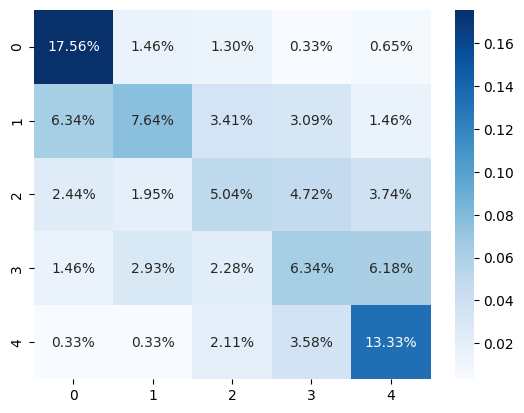

In [ ]:
pred_y = lr_1.predict(x_test_sc)
matrix = confusion_matrix(y_test, pred_y)
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
#classification reports
report = classification_report(y_test, pred_y)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.82      0.71       131
           1       0.53      0.35      0.42       135
           2       0.36      0.28      0.31       110
           3       0.35      0.33      0.34       118
           4       0.53      0.68      0.59       121

    accuracy                           0.50       615
   macro avg       0.48      0.49      0.48       615
weighted avg       0.48      0.50      0.48       615



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0e222dd4-00a3-4786-aa8b-a269f7a7f431' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>